#### 참고 : tensorflow.keras 공식 문서 (Official API Docs) @ https://www.tensorflow.org/api_docs/python/tf/keras

<br>

## 1. Data loading & preprocessing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ? import datasets, preprocessing # Scikit-learn (sklearn)

In [ ]:
# datasets.load # tab

In [6]:
datasets.load_boston() #.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
# print(datasets.load_boston()['DESCR'])

In [7]:
# datasets.load_boston().data

In [9]:
df = pd.?(datasets.load_boston().data) # make a pandas DataFrame from numpy array
df.?() # 머리를 영어로?

0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33

In [ ]:
x_data = datasets.load_boston().data 
y_data = datasets.load_boston().target # 집의 가격 (in $1,000s)

In [10]:
sc = preprocessing.?() # Apply standard scaling on x_data (Standardization)
x_data = sc.fit_transform(x_data)

print(x_data.?) # 모양을 영어로?
print(y_data.?) # 모양을 영어로?

(506, 13)
(506,)


<br>

## 2. Devide dataframe into X & Y -> Train X / Test X / Train Y / Test Y

In [7]:
from sklearn import model_selection

In [11]:
train_data, test_data, train_label, test_label = model_selection.?(x_data, y_data,
                                                                                 test_size=0.3,
                                                                                 random_state=0)
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(354, 13)
(152, 13)
(354,)
(152,)


<br>

## 3. Build & Train the model 

In [8]:
import tensorflow as tf

# tf.keras 에 필요한 함수들이 모여있습니다.
from tensorflow.? import datasets, utils
from tensorflow.? import models, layers, activations, initializers, losses, optimizers, metrics

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [13]:
model = models.?() # Build up the "Sequence" of layers (Linear stack of layers)

# Dense-layer (with he-initialization)
model.add(layers.?(input_dim=?, units=64, activation=None, kernel_initializer=initializers.?())) # he-uniform initialization
# model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('?')) # elu or relu (or layers.ELU / layers.LeakyReLU)

model.add(layers.?(units=64, activation=None, kernel_initializer=initializers.?())) 
model.add(layers.Activation('?'))

model.add(layers.?(units=32, activation=None, kernel_initializer=initializers.?())) 
model.add(layers.Activation('?'))
model.add(layers.?(rate=0.4)) # Dropout-layer

model.add(layers.Dense(units=?, activation=None)) 

In [14]:
# "Compile" the model description (Configures the model for training)

model.?(optimizer=optimizers.?(), # Please try the Adam-optimizer
              loss=losses.?, # MSE 
              metrics=[metrics.?]) # MSE

In [15]:
# "Fit" the model on training data

history = model.?(train_data, train_label, batch_size=100, epochs=1000, validation_split=0.3, verbose=0) 

In [16]:
# "Evaluate" the model on test data

result = model.?(test_data, test_label)

print('loss (mean_squared_error) :', result[0])

152/152 [==============================] - 0s 66us/sample - loss: 16.3706 - mean_squared_error: 16.3706
loss (mean_squared_error) : 16.370605845200387


In [17]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

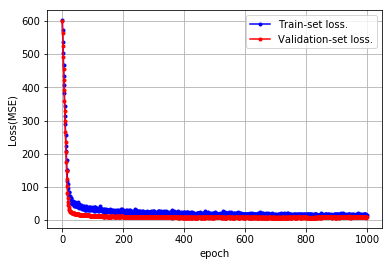

In [18]:
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']

x_len = np.arange(len(loss))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

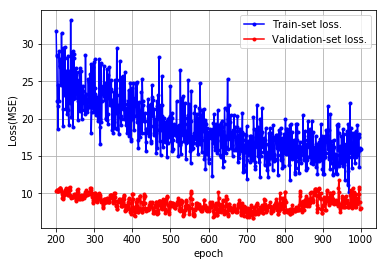

In [19]:
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']

x_len = np.arange(len(loss))

# epoch 200 ~ epoch 1000
plt.plot(x_len[?:], loss[?:], marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len[?:], val_loss[?:], marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

In [20]:
# "Predict" on test data

model.?(test_data)

array([[23.081247 ],
       [26.898668 ],
       [23.845587 ],
       [ 8.346418 ],
       [19.237059 ],
       [19.273458 ],
       [23.279764 ],
       [21.453012 ],
       [21.35739  ],
       [12.234278 ],
       [11.805803 ],
       [ 9.758585 ],
       [16.785378 ],
       [ 8.877489 ],
       [37.691593 ],
       [34.58548  ],
       [22.913696 ],
       [36.81197  ],
       [29.703747 ],
       [22.754206 ],
       [23.582047 ],
       [19.547117 ],
       [20.318872 ],
       [26.50196  ],
       [21.576494 ],
       [22.227907 ],
       [16.575083 ],
       [17.745165 ],
       [41.016666 ],
       [16.77359  ],
       [16.09251  ],
       [17.35671  ],
       [21.35761  ],
       [18.97355  ],
       [27.144953 ],
       [21.577827 ],
       [ 3.2716923],
       [37.58576  ],
       [12.1131315],
       [17.218077 ],
       [22.84907  ],
       [22.307314 ],
       [20.198465 ],
       [18.965082 ],
       [20.981482 ],
       [24.536684 ],
       [19.82762  ],
       [15.01

In [26]:
sample_data = np.array([[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.90, 9.14]])

In [27]:
sample_data = sc.?(sample_data) # "transform" the sample data with fitted scaler (no "fit", just "transform")
model.predict(sample_data)

array([[9.746259]], dtype=float32)